In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
from math import sqrt 
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
import time
import math
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Input, LSTM, Bidirectional, Conv1D
sns.set()
dataframe = pd.read_csv('USD_KZT Historical Data.csv', engine='python')

dataframe

Using TensorFlow backend.


,Date,Price,Open,High,Low,Change %
0,"Aug 30, 2019",387.275,387.275,387.275,387.275,0.00%
1,"Aug 29, 2019",387.275,387.875,388.125,386.395,-0.10%
2,"Aug 28, 2019",387.675,388.475,388.475,386.795,-0.18%
3,"Aug 27, 2019",388.375,387.225,388.375,387.125,0.32%
4,"Aug 26, 2019",387.130,387.060,388.360,387.060,0.26%
...,...,...,...,...,...,...
2779,"Jan 07, 2009",120.995,120.970,120.995,120.970,0.00%
2780,"Jan 06, 2009",120.995,121.020,121.045,120.940,0.01%
2781,"Jan 05, 2009",120.985,120.850,121.095,120.850,-0.12%
2782,"Jan 02, 2009",121.125,120.940,121.125,120.940,0.00%


# MLP

In [129]:
dataframe = pd.read_csv('USD_KZT Historical Data final.csv', usecols=[1], engine='python')
dataset = dataframe.iloc[::-1]
dataset
dataset=dataset.values
d = dataset.astype('float32')
size1 = int(len(d) * 0.8)
size2 = len(d) - size1
training_data, testing_data = d[0:size1,:], d[size1:len(d),:]
print(len(training_data), len(testing_data))


2227 557


In [0]:
def data_preparation(d,k):
    input_x, output_y = [], []
    for i in range(len(d)-k-1):
        n = d[i:(i+k), 0]
        input_x.append(n)
        output_y.append(d[i + k, 0])
    return np.array(input_x), np.array(output_y)
k = 10

training_input_x, training_output_y = data_preparation(training_data, k)
testing_input_x, testing_output_y = data_preparation(testing_data, k)
model = Sequential()
model.add(Dense(12, input_dim=k, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])




In [131]:
start_time = time.time()
train_error = []
test_error = []
train_error_mape = []
test_error_mape = []
for i in range(5):
    model.fit(training_input_x, training_output_y, epochs=40, batch_size=40, verbose=0)
    training_scores = model.evaluate(training_input_x, training_output_y, verbose=0)
    testing_scores= model.evaluate(testing_input_x, testing_output_y, verbose=0)
    #print(training_scores[0])
    train_error.append(training_scores[0])
    test_error.append(testing_scores[0])
    train_error_mape.append(training_scores[2])
    test_error_mape.append(testing_scores[2])
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")

train_error_avg = np.sum(train_error)/len(train_error)
train_mape = np.sum(train_error_mape)/len(train_error_mape)
print('Average Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (train_error_avg, math.sqrt(train_error_avg), train_mape))

test_error_avg = np.sum(test_error)/len(test_error)
test_mape = np.sum(test_error_mape)/len(test_error_mape)
print('Average Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (test_error_avg, math.sqrt(test_error_avg), test_mape))


Time went for training: 17.806098699569702 seconds
Average Train Score: 10.34 MSE (3.22 RMSE) 0.58 (MAPE)
Average Test Score: 8.18 MSE (2.86 RMSE) 0.60 (MAPE)


In [105]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

0.001


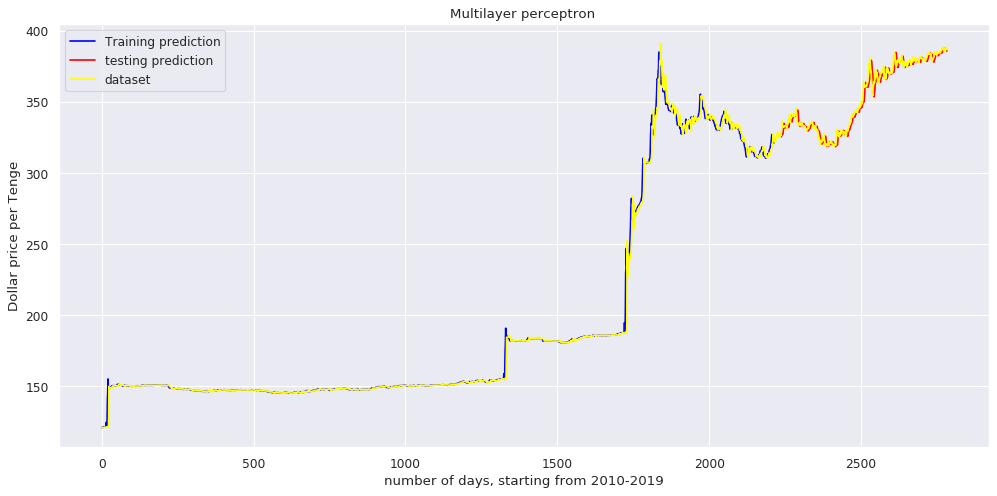

In [106]:
training_prediction1 = model.predict(training_input_x)
testing_prediction = model.predict(testing_input_x)
testing_prediction1 = np.empty_like(d)
testing_prediction1[:, :] = np.nan
testing_prediction1[len(training_prediction1)+(k*2)+1:len(d)-1, :] = testing_prediction
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training_prediction1,label='Training prediction',color="blue")
plt.plot(testing_prediction1,label= 'testing prediction',color='red')
plt.plot(d,label='dataset',color="yellow")
plt.xlabel('number of days, starting from 2010-2019')
plt.ylabel('Dollar price per Tenge')
plt.title("Multilayer perceptron ")
plt.legend()
plt.show()

CNN

In [120]:
k=10
train_X, train_y = data_preparation(training_data, k)
test_X, test_y = data_preparation(testing_data,k )

start_time = time.time()
train_X1 = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
model = Sequential()
model.add(Conv1D(filters=12, kernel_size=2, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(36, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])

train_error1 = []
test_error1 = []
train_error_mape1 = []
test_error_mape1 = []
for i in range(5):
    model.fit(train_X1, train_y, epochs=40, batch_size=40,verbose=1)
    training_scores = model.evaluate(train_X1,train_y, verbose=0)
    testing_scores= model.evaluate(test_X1, test_y, verbose=0)
    #print(training_scores[0])
    train_error1.append(training_scores[0])
    test_error1.append(testing_scores[0])
    train_error_mape1.append(training_scores[2])
    test_error_mape1.append(testing_scores[2])
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")

train_error_avg1 = np.sum(train_error1)/len(train_error1)
train_mape1 = np.sum(train_error_mape1)/len(train_error_mape1)
print('Average Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (train_error_avg1, math.sqrt(train_error_avg1), train_mape1))

test_error_avg1 = np.sum(test_error1)/len(test_error1)
test_mape1 = np.sum(test_error_mape1)/len(test_error_mape1)
print('Average Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (test_error_avg1, math.sqrt(test_error_avg1), test_mape1))

Epoch 1/40
2216/2216 [==============================] - 3s 2ms/step - loss: 7412.5534 - mean_absolute_error: 68.0874 - mean_absolute_percentage_error: 34.6549
Epoch 2/40
2216/2216 [==============================] - 0s 44us/step - loss: 31.8921 - mean_absolute_error: 3.6567 - mean_absolute_percentage_error: 1.7880
Epoch 3/40
2216/2216 [==============================] - 0s 47us/step - loss: 17.9560 - mean_absolute_error: 1.4890 - mean_absolute_percentage_error: 0.6050
Epoch 4/40
2216/2216 [==============================] - 0s 52us/step - loss: 17.8117 - mean_absolute_error: 1.4448 - mean_absolute_percentage_error: 0.5779
Epoch 5/40
2216/2216 [==============================] - 0s 47us/step - loss: 17.7785 - mean_absolute_error: 1.4817 - mean_absolute_percentage_error: 0.6006
Epoch 6/40
2216/2216 [==============================] - 0s 44us/step - loss: 17.8321 - mean_absolute_error: 1.4548 - mean_absolute_percentage_error: 0.5850
Epoch 7/40
2216/2216 [==============================] - 0s 48

In [0]:
#k=10
#train_X, train_y = data_preparation(training_data, k)
#test_X, test_y = data_preparation(testing_data,k )

#start_time = time.time()
#train_X1 = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
#test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
#model = Sequential()
#model.add(Conv1D(filters=12, kernel_size=2, activation='relu', input_shape=(10, 1)))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
#model.add(Dense(36, activation='relu'))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])
#model.fit(train_X1, train_y, epochs=40, batch_size=40,verbose=1)
#elapsed_time = time.time() - start_time
#print("Time went for training:", elapsed_time, "seconds")
#training_scores = model.evaluate(train_X1,train_y, verbose=0)
#print('Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (training_scores[0], math.sqrt(training_scores[0]),training_scores[2]))
#testing_scores= model.evaluate(test_X1, test_y, verbose=0)
#print('Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (testing_scores[0], math.sqrt(testing_scores[0]),testing_scores[2]))

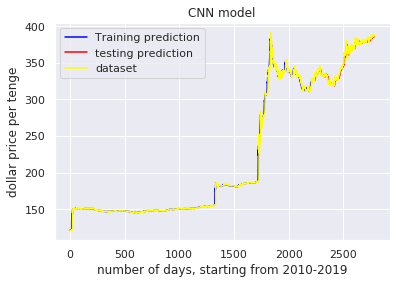

In [110]:
training_prediction2 = model.predict(train_X1)
testing_prediction = model.predict(test_X1)
testing_prediction2 = np.empty_like(d)
testing_prediction2[:, :] = np.nan
testing_prediction2[len(training_prediction2)+(10*2)+1:len(d)-1, :] = testing_prediction
plt.plot(training_prediction2,label='Training prediction',color="blue")
plt.plot(testing_prediction2,label= 'testing prediction',color='red')
plt.plot(d,label='dataset',color="yellow")
plt.title("CNN model")
plt.xlabel('number of days, starting from 2010-2019')
plt.ylabel('dollar price per tenge')
plt.legend()
plt.show()

 LSTM

In [126]:
start_time = time.time()
model = Sequential()
model.add(Bidirectional(LSTM(36, activation='relu'), input_shape=(10, 1)))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])

train_error2 = []
test_error2 = []
train_error_mape2 = []
test_error_mape2 = []
for i in range(5):
    model.fit(train_X1, train_y, epochs=40, batch_size=40, verbose=3)
    training_scores = model.evaluate(train_X1,train_y, verbose=0)
    testing_scores= model.evaluate(test_X1, test_y, verbose=0)
    #print(training_scores[0])
    train_error2.append(training_scores[0])
    test_error2.append(testing_scores[0])
    train_error_mape2.append(training_scores[2])
    test_error_mape2.append(testing_scores[2])
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")

train_error_avg2 = np.sum(train_error2)/len(train_error2)
train_mape2 = np.sum(train_error_mape2)/len(train_error_mape2)
print('Average Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (train_error_avg2, math.sqrt(train_error_avg2), train_mape2))

test_error_avg2 = np.sum(test_error2)/len(test_error2)
test_mape2 = np.sum(test_error_mape2)/len(test_error_mape2)
print('Average Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (test_error_avg2, math.sqrt(test_error_avg2), test_mape2))

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epo

In [0]:
#start_time = time.time()
#model = Sequential()
#model.add(Bidirectional(LSTM(36, activation='relu'), input_shape=(10, 1)))
#model.add(Dense(1))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])

#del.fit(train_X1, train_y, epochs=40, batch_size=40, verbose=3)
#elapsed_time = time.time() - start_time
#print("Time went for training:", elapsed_time, "seconds")
#training_scores = model.evaluate(train_X1,train_y, verbose=0)
#print('Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (training_scores[0], math.sqrt(training_scores[0]),training_scores[2]))
#testing_scores= model.evaluate(test_X1, test_y, verbose=0)
#print('Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (testing_scores[0], math.sqrt(testing_scores[0]),testing_scores[2]))

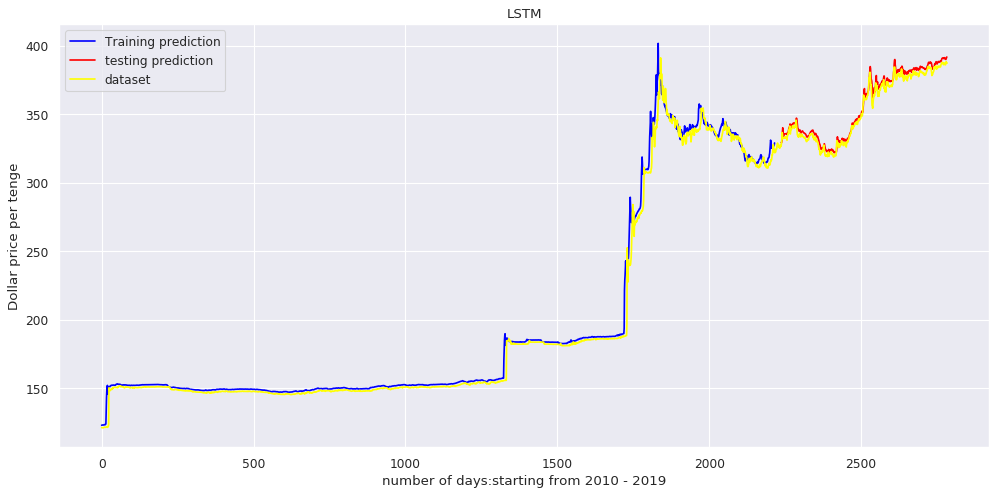

In [127]:
training_prediction3 = model.predict(train_X1)
testing_prediction = model.predict(test_X1)
testing_prediction3 = np.empty_like(d)
testing_prediction3[:, :] = np.nan
testing_prediction3[len(training_prediction3)+(10*2)+1:len(d)-1, :] = testing_prediction
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training_prediction3,label='Training prediction',color="blue")
plt.plot(testing_prediction3,label= 'testing prediction',color='red')
plt.plot(d,label='dataset',color="yellow")
#mainTitle = 'LSTM, Train Score:' + str(training_scores) + 'MSE (' + str(math.sqrt(training_scores))  + '), Test Score: ' + str(testing_scores) + 'MSE (' + str(math.sqrt(testing_scores)) + ' RMSE)'
plt.title('LSTM')
plt.xlabel('number of days:starting from 2010 - 2019')
plt.ylabel('Dollar price per tenge')
plt.legend()
plt.show()

# CNN+LSTM

In [0]:
train_X, train_y = data_preparation(training_data, 10)
test_X, test_y = data_preparation(testing_data, 10)
train_X1 = train_X.reshape((train_X.shape[0], 5, 2, 1))
test_X1 = test_X.reshape((test_X.shape[0], 5, 2, 1))

In [0]:
#start_time = time.time()
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=36, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(36, activation='relu'))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae","mape"])

In [119]:

train_error3 = []
test_error3 = []
train_error_mape3 = []
test_error_mape3 = []
for i in range(5):
    model.fit(train_X1, train_y, epochs=40, batch_size=40,verbose=0)
    training_scores = model.evaluate(train_X1,train_y, verbose=0)
    testing_scores= model.evaluate(test_X1, test_y, verbose=0)
    #print(training_scores[0])
    train_error3.append(training_scores[0])
    test_error3.append(testing_scores[0])
    train_error_mape3.append(training_scores[2])
    test_error_mape3.append(testing_scores[2])
elapsed_time = time.time() - start_time
print("Time went for training:", elapsed_time, "seconds")

train_error_avg3 = np.sum(train_error3)/len(train_error3)
train_mape3 = np.sum(train_error_mape3)/len(train_error_mape3)
print('Average Train Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (train_error_avg3, math.sqrt(train_error_avg3), train_mape3))

test_error_avg3 = np.sum(test_error3)/len(test_error3)
test_mape3 = np.sum(test_error_mape3)/len(test_error_mape3)
print('Average Test Score: %.2f MSE (%.2f RMSE) %.2f (MAPE)' % (test_error_avg3, math.sqrt(test_error_avg3), test_mape3))

Time went for training: 210.73521161079407 seconds
Average Train Score: 5.59 MSE (2.36 RMSE) 0.48 (MAPE)
Average Test Score: 4.75 MSE (2.18 RMSE) 0.44 (MAPE)


In [0]:
#model.fit(train_X1, train_y, epochs=40, batch_size=40,verbose=0)
#elapsed_time = time.time() - start_time
#print("Time went for training:", elapsed_time, "seconds")
#k=10
#training_scores = model.evaluate(train_X1,train_y, verbose=0)
#print('Train Score: %.2f MSE (%.2f RMSE)  %.2f (MAPE)' % (training_scores[0], math.sqrt(training_scores[0]),training_scores[2]))
#testing_scores= model.evaluate(test_X1, test_y, verbose=0)
#print('Test Score: %.2f MSE (%.2f RMSE)  %.2f (MAPE)' % (testing_scores[0], math.sqrt(testing_scores[0]),testing_scores[2]))

Train Score: 5.10 MSE (2.26 RMSE)  0.36 (MAPE)
Test Score: 3.55 MSE (1.88 RMSE)  0.36 (MAPE)


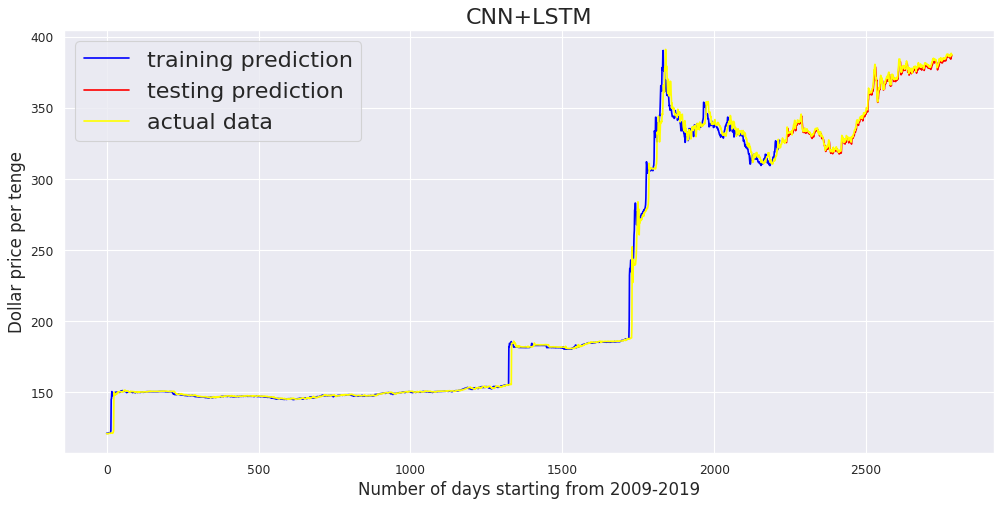

In [84]:
training_prediction4 = model.predict(train_X1)
testing_prediction = model.predict(test_X1)
testing_prediction4 = np.empty_like(d)
testing_prediction4[:, :] = np.nan
testing_prediction4[len(training_prediction4)+(k*2)+1:len(d)-1, :] = testing_prediction
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training_prediction4,label='training prediction',color="blue")
plt.plot(testing_prediction4,label= 'testing prediction',color='red')
plt.plot(d,label='actual data',color="yellow")
plt.title("CNN+LSTM",fontsize=20)
plt.xlabel('Number of days starting from 2009-2019',fontsize=15)
plt.ylabel('Dollar price per tenge',fontsize=15)
plt.legend(fontsize=20)
plt.show()

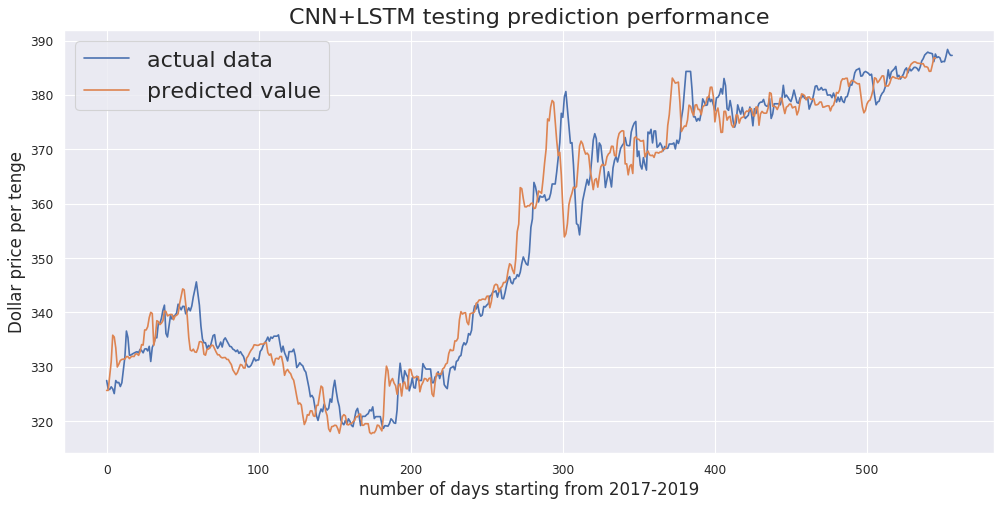

In [86]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testing_data,label='actual data')
plt.plot(testing_prediction,label='predicted value')
plt.title("CNN+LSTM testing prediction performance",fontsize=20)
plt.xlabel('number of days starting from 2017-2019',fontsize=15)
plt.ylabel('Dollar price per tenge',fontsize=15)
plt.legend(fontsize=20)
plt.show()

RESULTS

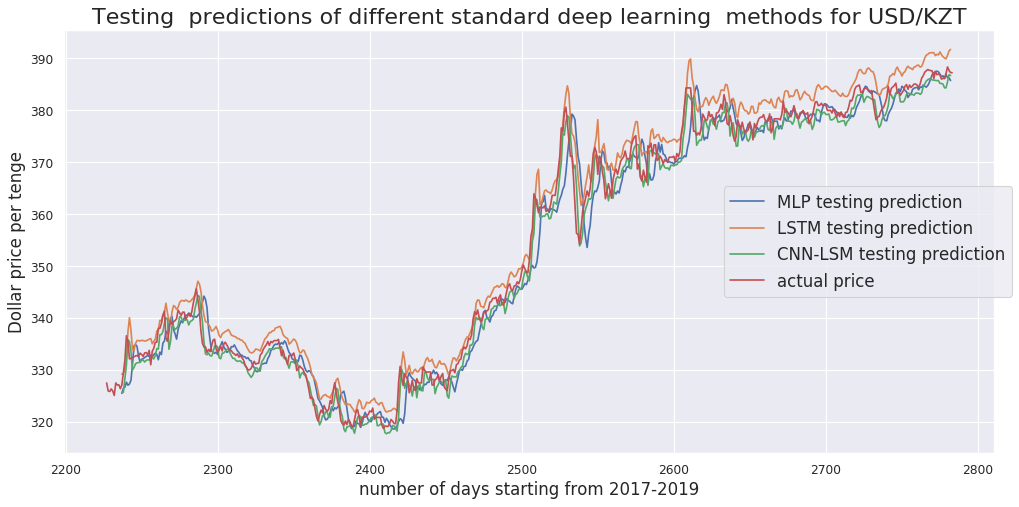

In [128]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testing_prediction1,label= 'MLP testing prediction')
#plt.plot(testing_prediction2,label= 'CNN testing prediction')
plt.plot(testing_prediction3,label= 'LSTM testing prediction')
plt.plot(testing_prediction4,label= 'CNN-LSM testing prediction')
plt.title("Testing  predictions of different standard deep learning  methods for USD/KZT",fontsize=20)
plt.plot(np.arange(size1,size1+size2), d[size1:size1+size2],label="actual price")
plt.xlabel('number of days starting from 2017-2019',fontsize=15)
plt.ylabel('Dollar price per tenge',fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.5),fontsize=15)
plt.show()